In [10]:
#downloading the dataset from Kaggle
!pip3 install kaggle
!kaggle datasets download uciml/breast-cancer-wisconsin-data -f data.csv

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
data.csv: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
#reading the dataset
import pandas as pd
df = pd.read_csv('data.csv')

In [12]:
#cleaning dataset of id_number, and 'unknown' column
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [13]:
#Length of all data after modifications
len(df)

569

In [14]:
#Mapping 'diagnosis' to 'Benign' and 'Malignant'
df['diagnosis'] = df['diagnosis'].map({'B': 'Benign', 'M': 'Malignant'})

#Defining color mapping for 'Benign' and 'Malignant' (because we like pretty things :) ) 
color_map = {'Benign': 'darkturquoise', 'Malignant': 'darkred'}

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns


#Defining the four main metric groups for cleaner visualisation
size_metrics = ['radius_mean', 'area_mean', 'perimeter_mean']
shape_metrics = ['concavity_mean', 'concave points_mean', 'smoothness_mean']
texture_metrics = ['texture_mean', 'texture_worst']
compactness_metrics = ['compactness_mean', 'compactness_worst']

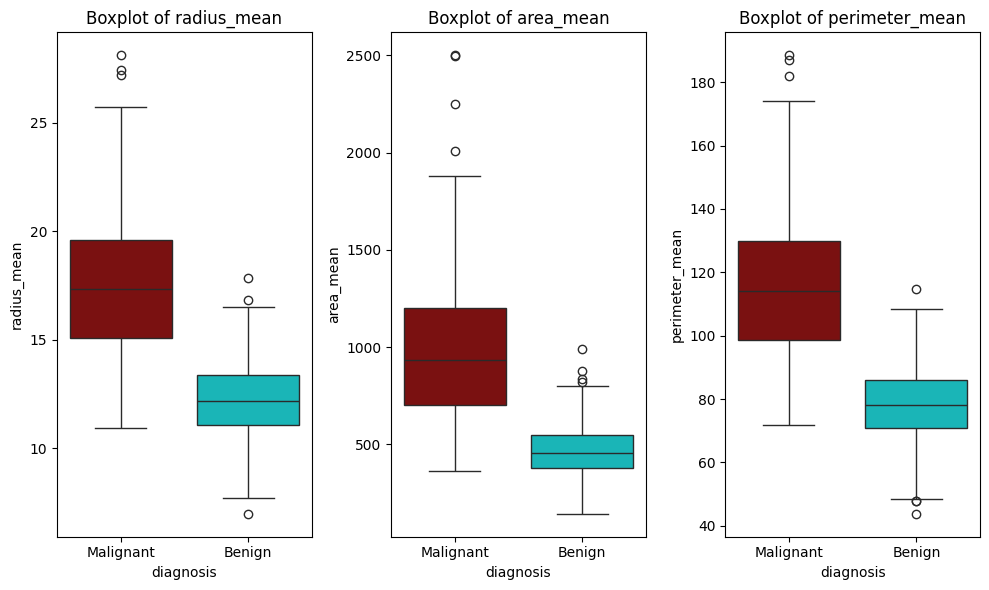

In [16]:
#Size: Boxplots
plt.figure(figsize=(10, 6))
for i, metric in enumerate(size_metrics, 1):
    plt.subplot(1, len(size_metrics), i)
    sns.boxplot(x='diagnosis', y=metric, data=df, 
                hue='diagnosis', 
                dodge=False,  
                palette=color_map)
    plt.title(f"Boxplot of {metric}")
    plt.xlabel("diagnosis")
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

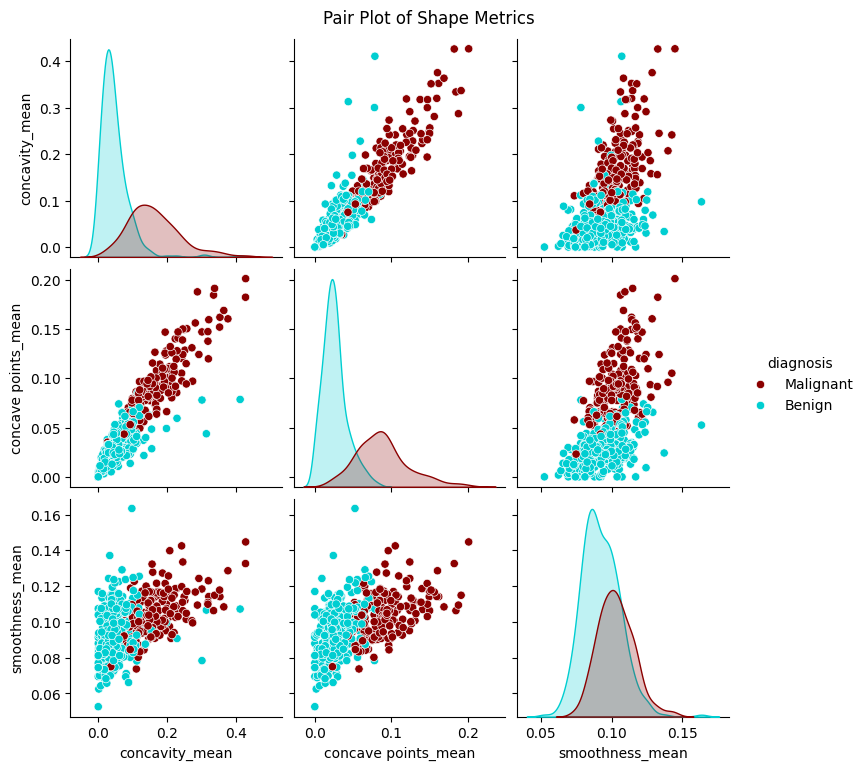

In [17]:
#Shape: Pair Plots 
sns.pairplot(
    df[shape_metrics + ['diagnosis']],
    hue='diagnosis', 
    diag_kind='kde', 
    palette=color_map  
)
plt.suptitle("Pair Plot of Shape Metrics", y=1.02)
plt.show()

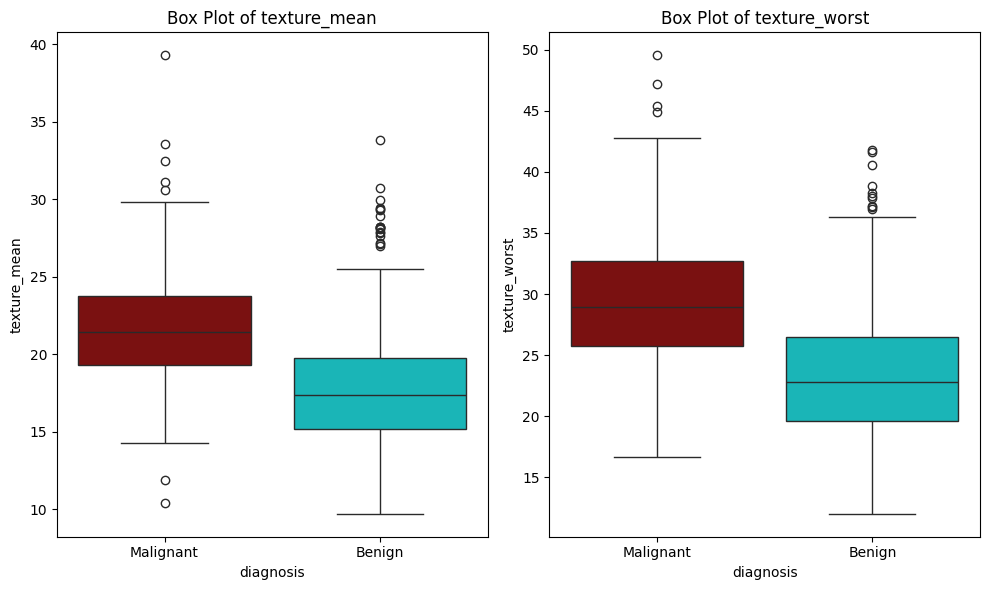

In [18]:
#Texture: Box Plots 
plt.figure(figsize=(10, 6))
for i, metric in enumerate(texture_metrics, 1):
    plt.subplot(1, len(texture_metrics), i)
    sns.boxplot(x='diagnosis', y=metric, data=df, 
                hue='diagnosis', 
                dodge=False,  
                palette=color_map)
    plt.title(f"Box Plot of {metric}")
    plt.xlabel("diagnosis")
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

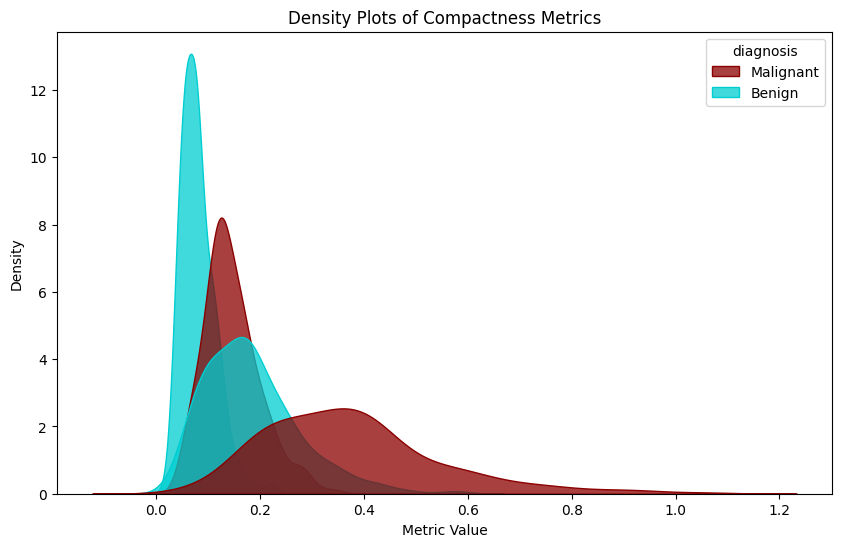

In [19]:
#Compactness: Density Plot 
plt.figure(figsize=(10, 6))
for metric in compactness_metrics:
    sns.kdeplot(
        data=df,
        x=metric,
        hue='diagnosis', 
        fill=True, 
        common_norm=False, 
        alpha=0.75, 
        palette=color_map  
    )
plt.title("Density Plots of Compactness Metrics")
plt.xlabel("Metric Value")
plt.ylabel("Density")
plt.show()